<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20070_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E/20/070 - DILSHAN H.A.L.L.

Activity 1 - Derivation oF 2-DOF Model that will Capture the First Two Dominant Modes of Small Amplitude Vibration of the System

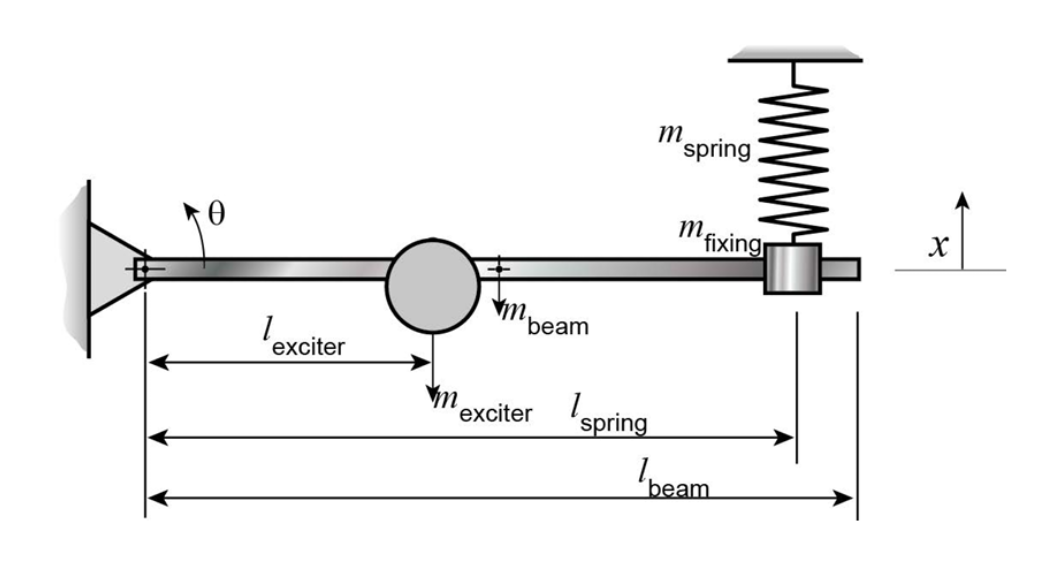

The Euler-Bernoulli beam theory models small-amplitude transverse vibrations of a slender beam as a continuous system using the following partial differential equation:

$$
\rho A \frac{\partial^2 y}{\partial t^2} + c \frac{\partial y}{\partial t} + EI \frac{\partial^4 y}{\partial x^4} + P \frac{\partial^2 y}{\partial x^2} = f(t,x)
$$

In this equation:
- $\rho$ represents the material density
- $A$ denotes the cross-sectional area of the uniform beam
- $E$ is the elastic modulus
- $I$ is the second moment of area of the cross-section
- $c$ represents the viscous damping coefficient distributed along the beam length
- $P$ denotes the axial compressive load
- $f(t,x)$ is the distributed transverse loading per unit length

Since $P = 0$ for this case, the above PDE can be reduced to:

$$
{\rho A}{{\partial^2 y} \over {\partial t^2}} + c{{\partial y} \over {\partial t}}+EI{{\partial^4 y} \over {\partial x^4}}=f(t,x)
$$


The solutions of the above PDE that satisfy the boundary conditions of a pinned-free beam.

\begin{align*}y(0,t)&=0,\:\:\:\:\:\:\: {\partial^3 y \over \partial x^3}(l_{beam},t)=0,\\{\partial^2 y \over \partial x^2}(0,t)&=0,\:\:\:\:\:\:\: {\partial^2 y \over \partial x^2}(l_{beam},t)=0,\end{align*}

where $k_{\theta} = k_{spring}l_{spring}^2$ is the rotational stiffness

**Free Vibration Analysis for Mode Shapes:**

Let $\mathfrak{F}$ be the infintie dimensional vector space of twice differentiable functions defined on the interval $[0,L]$. Then $H: \mathfrak{F}\mapsto \mathfrak{F}$ defined by

\begin{align}H&=\frac{EI} {\rho A}{{\partial^4 } \over {\partial x^4}}
\end{align}

is a linear operator on $\mathfrak{F}$ and the equations of motion take the form

\begin{align*}
{{\partial^2 y} \over {\partial t^2}} + C{{\partial y} \over {\partial t}}+Hy&=q(t,x)
\end{align*}

where $c = C \rho A$ and $f(t) = \rho A q(t)$

$H$ maps a transverse deflection shape to the acceleration caused purely by beam bending, subject to the beam’s boundary conditions. Let $H$ have distinct positive eignevalues $\{\omega_k^2\}_{k=1}^\infty$ with corrsponding eigenvectors $\{\psi_k\}_{k=1}^\infty$ i.e. mode shapes.

Then, the eigenvalue problem can be defined as:

\begin{align*}
H \psi_k(x) &= \omega_k^2 \psi(x)
\end{align*}

Substituting $(1)$, we get:

\begin{align*}
\frac{EI}{\rho A} \frac{\partial^4 \psi_k(x)}{\partial x^4} &= \omega_k^2 \psi_k(x) \\
\frac{\partial^4 \psi_k(x)}{\partial x^4} &= \frac{\rho A \, \omega_k^2}{EI} \psi_k(x)  \\
\frac{\partial^4 \psi_k(x)}{\partial x^4} &= \beta_k^4 \psi_k(x)
\end{align*}

where $\beta_k^4 = \frac{\rho A \, \omega_k^2}{EI}$

The solution to the fourth-order differential equation (1) takes the form:

\begin{align*}
\psi_k(x) = A_k \cosh(\beta_k x) + B_k \sinh(\beta_k x) + C_k \cos(\beta_k x) + D_k \sin(\beta_k x)
\end{align*}

The constants $A_k$, $B_k$, $C_k$, and $D_k$ are obtained by applying appropriate boundary conditions.

At the fixed base ($x = 0$):

$$
\psi_k(0) = 0 \quad \Rightarrow \quad A_k + C_k = 0
$$

<br>

Taking derivatives:

\begin{align*}
\psi_k'(0) &= \beta_k(B_k+D_k) \\
\psi_k''(0) &= \beta_k^2(A_k-C_k)
\end{align*}

Since $C_k = -A_k$, substituting into the rotational spring boundary condition yields:

\begin{align*}
EI \beta_k^2(A_k-C_k) - k_{\theta}\beta_k(B_k+D_k) &= 0 \\
2EI \beta_k^2A_k - k_{\theta}\beta_k(B_k+D_k) &= 0
\end{align*}

At the free end ($x = l_{beam}$):

\begin{align*}
\psi_k''(l_{beam}) = 0 & \Rightarrow
& A_k(\cosh(\beta_k l_{beam}) + \cos(\beta_k l_{beam})) + B_k\sinh(\beta_k l_{beam}) - D_k\sin(\beta_k l_{beam})  = 0 \\
\psi_k'''(l_{beam}) = 0 & \Rightarrow
& A_k(\sinh(\beta_k l_{beam}) - \sin(\beta_k l_{beam})) + B_k\cosh(\beta_k l_{beam}) - D_k \cos(\beta_k l_{beam}) = 0
\end{align*}

<br>

These three conditions can be expressed as a homogeneous linear system:

$$
\mathbf{H}(\beta_k)\begin{bmatrix} A_k \\ B_k \\ D_k \end{bmatrix} = \mathbf{0}
$$

where $\mathbf{H}(\beta_k)$ is a $3 \times 3$ matrix.

Non-trivial solutions exist when $\text{det}\,\mathbf{H}(\beta_k) = 0$. We solve this characteristic equation numerically to determine the eigenvalues $\beta_k$ for each mode $k$, then solve the homogeneous system to obtain the corresponding coefficients $A_k$, $B_k$, and $D_k$.

In [ ]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import scipy.optimize as opt
import scipy.integrate as integrate
import matplotlib.pyplot as plt


In [ ]:
# Characteristic Determinant Calculation
def compute_characteristic_determinant(beta, beam_length, flexural_rigidity, spring_stiffness):
    """
    Calculate the determinant of the characteristic matrix for the beam system.

    Parameters:
    -----------
    beta : float
        Eigenvalue parameter
    beam_length : float
        Length of the beam
    flexural_rigidity : float
        Bending stiffness (EI)
    spring_stiffness : float
        Rotational spring stiffness at base
    """
    beta_L = beta * beam_length

    # Construct characteristic matrix
    characteristic_matrix = np.array([
        [2*flexural_rigidity*beta**2, -spring_stiffness*beta, -spring_stiffness*beta],
        [np.cosh(beta_L) + np.cos(beta_L), np.sinh(beta_L), -np.sin(beta_L)],
        [np.sinh(beta_L) - np.sin(beta_L), np.cosh(beta_L), -np.cos(beta_L)]
    ])

    return det(characteristic_matrix)


def compute_eigenvalues(beam_length, flexural_rigidity, spring_stiffness, num_modes=2, search_limit=50):
    """
    Find eigenvalues by locating zero-crossings of the characteristic determinant.

    Returns:
    --------
    eigenvalues : ndarray
        Array of beta values satisfying det(H) = 0
    """
    print(f"\nSearching for {num_modes} eigenvalues...")
    print(f"Search range: [1e-4, {search_limit}]")

    eigenvalues = []
    search_range = np.linspace(1e-4, search_limit, 5000)

    # Evaluate determinant across search range
    det_values = np.array([compute_characteristic_determinant(b, beam_length, flexural_rigidity, spring_stiffness)
                           for b in search_range])

    # Locate sign changes (zero-crossings)
    for i in range(len(search_range) - 1):
        if det_values[i] * det_values[i+1] < 0:
            # Refine root using Brent's method
            eigenvalue = brentq(
                compute_characteristic_determinant,
                search_range[i],
                search_range[i+1],
                args=(beam_length, flexural_rigidity, spring_stiffness)
            )
            eigenvalues.append(eigenvalue)
            print(f"  Mode {len(eigenvalues)}: β_{len(eigenvalues)} = {eigenvalue:.6f}")

            if len(eigenvalues) >= num_modes:
                break

    if len(eigenvalues) < num_modes:
        print(f"\nWarning: Only found {len(eigenvalues)} eigenvalues out of {num_modes} requested.")
    else:
        print(f"\nSuccessfully found all {num_modes} eigenvalues.")

    return np.array(eigenvalues)


# Mode Shape Coefficient Extraction
def extract_mode_coefficients(beta, beam_length, flexural_rigidity, spring_stiffness, mode_number=None):
    """
    Solve the homogeneous system to find mode shape coefficients A, B, C, D.
    Uses SVD to find the null space of the characteristic matrix.

    Returns:
    --------
    A, B, C, D : float
        Coefficients for the mode shape function
    """
    beta_L = beta * beam_length

    characteristic_matrix = np.array([
        [2*flexural_rigidity*beta**2, -spring_stiffness*beta, -spring_stiffness*beta],
        [np.cosh(beta_L) + np.cos(beta_L), np.sinh(beta_L), -np.sin(beta_L)],
        [np.sinh(beta_L) - np.sin(beta_L), np.cosh(beta_L), -np.cos(beta_L)]
    ])

    # Use SVD to find null space (smallest singular value's right singular vector)
    _, singular_values, Vt = svd(characteristic_matrix)
    null_vector = Vt[-1, :]  # Corresponds to [A, B, D]

    A_coeff = null_vector[0]
    B_coeff = null_vector[1]
    D_coeff = null_vector[2]
    C_coeff = -A_coeff  # From boundary condition constraint

    if mode_number is not None:
        print(f"\nMode {mode_number} shape coefficients:")
        print(f"  A_{mode_number} = {A_coeff:.6f}")
        print(f"  B_{mode_number} = {B_coeff:.6f}")
        print(f"  C_{mode_number} = {C_coeff:.6f}")
        print(f"  D_{mode_number} = {D_coeff:.6f}")

    return A_coeff, B_coeff, C_coeff, D_coeff

Then, the eigenvalues of $H$ are given by,

$$
\{\omega_k^2\}_{k=1}^\infty = \left\{\frac{EI}{\rho A}{\beta_k}^4\right\}_{k=1}^\infty
$$

and the eigenvectors/mode shapes of $H$ are given by,

$$
\{\psi_k\}_{k=1}^\infty = \left\{A_k \cosh(\beta_k x) + B_k \sinh(\beta_k x) + C_k \cos(\beta_k x) + D_k \sin(\beta_k x)\right\}_{k=1}^\infty
$$

$A_k$, $B_k$, $C_k$ and $D_k$ to be found using numerical methods programmed in above functions.

**Forced Vibration Response using Modal Expansion:**

In the event the oscillator is turned on, a forced vibration takes place due to oscillating force $Q$.

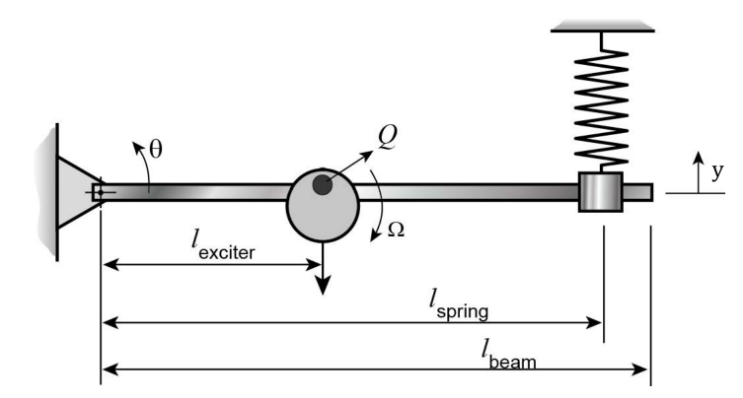

Assuming there are no base excitations, let consider the external load on the beam to be:

$$
q(x,t) = Q \sin{\Omega t} ⋅ \delta(x - l_{exciter})
$$

The system can be modelled as decoupled forced, damped 1-DOF oscillators for each mode k in the following form:

$$
\ddot{y} + C\dot{y} + Hy = q(x,t) \ \ \Rightarrow \ \ m_k\ddot{z}_k+2\zeta_k\omega_km_k\dot{z}_k+ m_k\omega_k^2z_k =\langle\langle\psi_k(x),q(x,t)\rangle\rangle
$$

where $\zeta_k=\frac{C}{2\omega_k}$ and $m_k = \int_0^{l_\text{beam}} \rho A \, \psi_k^2(x)\,dx$

Modal masses normalise the arbitary scaling caused by the selection of $B_k$ and $D_k$ values.

Then, solving the decoupled ODE of each $k$ yields,

$$
z_k(t) = \chi_k(\Omega)\cos{(\Omega t+\phi_k(\Omega))}
$$

where $\chi_k(\Omega)$ is the steady-state amplitude and $\phi_k(\Omega)$ is the phase lag for the $k^{th}$ modal coordinate at forcing frequency $\Omega$.


Let us derive expressions for above definitions:

The mode shapes are orthonormal with respect to the inner product defined by:

\begin{align*}\langle\langle \psi_k(x),q(x)\rangle \rangle &= \int_0^{l_{beam}}\psi_k(x)q(x)\,dx \\
\langle\langle \psi_k(x),q(x)\rangle \rangle &= \int_0^{l_{beam}}\psi_k(x) Q \sin{(\Omega t)} \delta(x - l_{exciter})\,dx \\
&= Q \sin{(\Omega t)} \int_0^{l_{beam}}\psi_k(x) \delta(x - l_{exciter})\,dx \\
&= Q \sin{(\Omega t)} \psi_k(l_{exciter})
\end{align*}

By definition,

\begin{align*}
\chi_k(\Omega) & = \left|\frac{\langle\langle \psi_k(x),q(x)\rangle \rangle}{ m_k\sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}}\right| \\
\chi_k(\Omega) & = \left|\frac{Q \psi_k(l_{exciter})}{m_k\sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}}\right| \\
\end{align*}

and

$$
\phi_k(\Omega) =\arctan{\left(\frac{2\zeta_k\Omega\omega_k}{\omega_k^2 - \Omega^2}\right)}
$$

Then, the **infinite dimensional solution** for this setup can be given by:

\begin{align*}
y(t,x)=\sum_{k=1}^\infty z_k(t)\psi_k(x)=\sum_{k=1}^\infty\chi_k(\Omega)\cos{(\Omega t+\phi_k(\Omega))}\psi_k(x)
\end{align*}

**Reduction to 2-DOF Model with Localised Spring–Damper Attachment:**

Truncating the infinite-dimensional solution to the first two dominant modes, the displacement can be approximated as:

\begin{align*}
y(t,x) \approx \chi_1(\Omega) \cos(\Omega t + \phi_1(\Omega)) \, \psi_1(x)
+ \chi_2(\Omega) \cos(\Omega t + \phi_2(\Omega)) \, \psi_2(x)
\end{align*}

The corresponding 2-DOF system in matrix form is given by,

\begin{align*}
\underbrace{\begin{bmatrix} m_1 & 0 \\ 0 & m_2 \end{bmatrix}}_{M_\text{beam}}
\begin{bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} 2 \zeta_1 \omega_1 m_1 & 0 \\ 0 & 2 \zeta_2 \omega_2 m_2 \end{bmatrix}}_{C_\text{beam}}
\begin{bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} \omega_1^2 m_1 & 0 \\ 0 & \omega_2^2 m_2 \end{bmatrix}}_{K_\text{beam}}
\begin{bmatrix} z_1 \\ z_2 \end{bmatrix}
=
\underbrace{\begin{bmatrix} Q \psi_1(l_{exciter}) \sin{(\Omega t)} \\[1mm] Q \psi_2(l_{exciter}) \sin{(\Omega t)} \end{bmatrix}}_{F_{exciter}}
\end{align*}


Let us now account for the spring and viscous damper attachments.

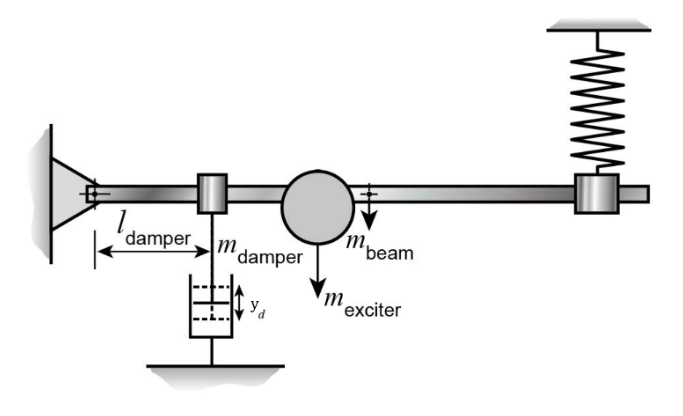

**Part I: Consideration of Additional Masses**

For accuracy, the theory allows for a proportion of the spring mass - that part which moves and contributes to the overall mass of the system. According to **Rayleigh's Theory**, this is equal to 1/3 the mass of the spring. The fixing between the spring and the beam also needs to be allowed for.

$$
m_{\text{eff}} = \frac{1}{3} m_{\text{spring}} + m_{\text{fixed}}
$$

The transverse acceleration at the attachment point is:

\begin{align*}
\ddot y(l_{\text{spring}},t)
=
\ddot z_1(t)\psi_1(l_{\text{spring}})
+ \ddot z_2(t)\psi_2(l_{\text{spring}})
\end{align*}

The inertia force exerted by the attached mass is:

\begin{align*}
F_{\text{inertia}}(t)
=
m_{\text{eff}}
\ddot y(l_{\text{spring}},t)
\end{align*}

Projecting this force onto the modal coordinates gives:

\begin{align*}
\begin{bmatrix}
F^{(m)}_1 \\
F^{(m)}_2
\end{bmatrix}
=
M_{\text{spring}}
\begin{bmatrix}
\ddot z_1 \\
\ddot z_2
\end{bmatrix}
\end{align*}

where the additional mass matrix is

\begin{align*}
M_{\text{spring}}
=
m_{\text{eff}}
\begin{bmatrix}
\psi_1^2(l_{\text{spring}}) &
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) \\
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) &
\psi_2^2(l_{\text{spring}})
\end{bmatrix}
\end{align*}

Similarly, additional masses of damper and exciter can be written as:

$$
M_{\text{damper}} =
m_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
$$

$$
M_{\text{exciter}} =
m_{\text{exciter}}
\begin{bmatrix}
\psi_1^2(l_{\text{exciter}}) &
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) \\
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) &
\psi_2^2(l_{\text{exciter}})
\end{bmatrix}
$$

<br>

**Part II: Consideration of Damper Attachment**



By applying the constitutive relation for a viscous damper,

\begin{align*}
F_{\text{damper}}(t) = c_{\text{damper}} \dot{y}(l_{\text{damper}},t)
\end{align*}

Using the two-mode approximation,

\begin{align*}
\dot y(l_{\text{damper}},t) = \dot z_1(t)\psi_1(l_{\text{damper}})+\dot z_2(t)\psi_2(l_{\text{damper}})
\end{align*}

The modal force acting on the $k^{\text{th}}$ mode is obtained by projection:

\begin{align*}
F^{(c)}_k(t) = c_{\text{damper}}\left(\dot{z_1}\psi_1(l_{\text{damper}}) +\dot{z_2}\psi_2(l_{\text{damper}})\right)\psi_k(l_{\text{damper}})
\end{align*}

This yields the matrix form:

\begin{align*}
\begin{bmatrix}
F^{(c)}_1 \\
F^{(c)}_2
\end{bmatrix} = C_{\text{damper}}
\begin{bmatrix}
\dot z_1 \\
\dot z_2
\end{bmatrix}
\end{align*}

where

\begin{align*}
C_{\text{damper}} =
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
\end{align*}

Dynamic and inertial contributions of spring, damper and exciter now can be included the 2-DOF system.

The final reduced system equation is given by:

$$
(\mathbf{M_\text{beam}} + \mathbf{M_\text{spring}} + \mathbf{M_\text{damper}} + \mathbf{M_\text{exciter}}) \mathbf{\ddot{z}} + (\mathbf{C_\text{beam} + \mathbf{C_{\text{damper}}}})\mathbf{\dot{z}} + \mathbf{K_{\text{beam}}}\mathbf{z} = \mathbf{F_{\text{exciter}}}
$$

where $\mathbf{M}, \mathbf{C}, \mathbf{K} \in \mathbb{M_{2x2}}$ and $\mathbf{F}, \mathbf{z} \in \mathbb{R_2}$

In [ ]:
# ================= Beam Specifications =================
breadth = 0.025          # Width of beam (m)
thickness = 0.01         # Height of beam (m)
cross_section_area = breadth * thickness  # Area (m^2)
beam_mass = 1.65         # Total beam mass (m)
beam_length = 0.815      # Length of beam (m)
elastic_modulus = 2e+11  # Young's Modulus (Pa)
second_moment_area = breadth * thickness**3 / 12  # Moment of inertia (m^4)
material_density = beam_mass / (cross_section_area * beam_length)  # Material density (kg/m^3)

# ================= Spring Characteristics ==============
spring_stiffness = 3800  # Stiffness coefficient (N/m)
spring_position = 0.75   # Distance from base (m)
spring_mass = 0.388      # Mass of spring (kg)
attached_mass = 0.009    # Additional fixed mass (kg)

# Equivalent torsional spring at base
torsional_stiffness = spring_stiffness * spring_position**2

# ================= Damper Characteristics ==============
damper_position = 0.2    # Distance from base (m)
damper_mass = 0.53       # Associated mass (kg)

# ================= Excitation System =============
exciter_mass = 4.2       # Mass of exciter (kg)
exciter_position = 0.4   # Distance from base (m)

In [ ]:
# ================= Calculate first two beta values =================
beta_solutions = compute_eigenvalues(beam_length, elastic_modulus*second_moment_area, torsional_stiffness, num_modes=2)
first_beta, second_beta = beta_solutions
print(f"first_beta = {first_beta:.4f}, second_beta = {second_beta:.4f}")

# ================= Mode shape evaluation function =================
def mode_shape(position, beta_val, length, flexural_rigidity, k_rot):
    coeff_A, coeff_B, coeff_C, coeff_D = extract_mode_coefficients(beta_val, length, flexural_rigidity, k_rot)
    return coeff_A*np.cosh(beta_val*position) + coeff_B*np.sinh(beta_val*position) + coeff_C*np.cos(beta_val*position) + coeff_D*np.sin(beta_val*position)

# ================= Calculate mode shapes at key locations =================
mode1_at_spring = mode_shape(spring_position, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)
mode2_at_spring = mode_shape(spring_position, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

mode1_at_damper = mode_shape(damper_position, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)
mode2_at_damper = mode_shape(damper_position, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

mode1_at_exciter = mode_shape(exciter_position, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)
mode2_at_exciter = mode_shape(exciter_position, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

print(f"mode1(spring_pos) = {mode1_at_spring:.4f}, mode2(spring_pos) = {mode2_at_spring:.4f}")
print(f"mode1(damper_pos) = {mode1_at_damper:.4f}, mode2(damper_pos) = {mode2_at_damper:.4f}")
print(f"mode1(exciter_pos) = {mode1_at_exciter:.4f}, mode2(exciter_pos) = {mode2_at_exciter:.4f}")

# ================= Calculate modal masses =================
def compute_modal_mass(beta_value):
    """Calculate integral of density*area*mode_shape^2 over beam length"""
    mode_squared = lambda pos: material_density * cross_section_area * mode_shape(pos, beta_value, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)**2
    mass_integral, _ = quad(mode_squared, 0, beam_length)
    return mass_integral

modal_mass_1 = compute_modal_mass(first_beta)
modal_mass_2 = compute_modal_mass(second_beta)

# ================= Compute natural frequencies (Beam only system) =================
angular_freq_1 = (first_beta**2) * np.sqrt(elastic_modulus*second_moment_area/(material_density*cross_section_area))
angular_freq_2 = (second_beta**2) * np.sqrt(elastic_modulus*second_moment_area/(material_density*cross_section_area))

print(f"Modal mass modal_mass_1 = {modal_mass_1:.4f} kg, modal_mass_2 = {modal_mass_2:.4f} kg")
print(f"Beam natural frequencies: angular_freq_1 = {angular_freq_1:.4f} rad/s, angular_freq_2 = {angular_freq_2:.4f} rad/s")


Searching for 2 eigenvalues...
Search range: [1e-4, 50]
  Mode 1: β_1 = 1.941735
  Mode 2: β_2 = 5.194227

Successfully found all 2 eigenvalues.
first_beta = 1.9417, second_beta = 5.1942
mode1(spring_pos) = -1.3706, mode2(spring_pos) = -0.8789
mode1(damper_pos) = -0.2491, mode2(damper_pos) = 0.7102
mode1(exciter_pos) = -0.6133, mode2(exciter_pos) = 0.8923
Modal mass modal_mass_1 = 1.0818 kg, modal_mass_2 = 0.7688 kg
Beam natural frequencies: angular_freq_1 = 54.0892 rad/s, angular_freq_2 = 387.0553 rad/s


In [ ]:
# ========= BEAM SYSTEM MATRICES =========
beam_mass_matrix = np.array([[modal_mass_1, 0.0],
                              [0.0, modal_mass_2]])
beam_stiffness_matrix = np.array([[modal_mass_1 * angular_freq_1**2, 0.0],
                                   [0.0, modal_mass_2 * angular_freq_2**2]])

# ========= SPRING CONTRIBUTION =========
effective_spring_mass = (1/3) * spring_mass + attached_mass
spring_mass_matrix = effective_spring_mass * np.array([[mode1_at_spring**2, mode1_at_spring * mode2_at_spring],
                                                        [mode1_at_spring * mode2_at_spring, mode2_at_spring**2]])

# ========= DAMPER CONTRIBUTION =========
damper_mass_matrix = damper_mass * np.array([[mode1_at_damper**2, mode1_at_damper * mode2_at_damper],
                                              [mode1_at_damper * mode2_at_damper, mode2_at_damper**2]])

# ========= EXCITER CONTRIBUTION =========
exciter_mass_matrix = exciter_mass * np.array([[mode1_at_exciter**2, mode1_at_exciter * mode2_at_exciter],
                                                [mode1_at_exciter * mode2_at_exciter, mode2_at_exciter**2]])

def display_matrix(matrix_name, matrix_data):
    print(f"{matrix_name}:")
    for row_data in matrix_data:
        print("  [" + ", ".join(f"{element:10.3f}" for element in row_data) + "]")
    print()  # Add spacing between matrices

display_matrix("beam_mass_matrix", beam_mass_matrix)
display_matrix("spring_mass_matrix", spring_mass_matrix)
display_matrix("damper_mass_matrix", damper_mass_matrix)
display_matrix("exciter_mass_matrix", exciter_mass_matrix)
display_matrix("beam_stiffness_matrix", beam_stiffness_matrix)

beam_mass_matrix:
  [     1.082,      0.000]
  [     0.000,      0.769]

spring_mass_matrix:
  [     0.260,      0.167]
  [     0.167,      0.107]

damper_mass_matrix:
  [     0.033,     -0.094]
  [    -0.094,      0.267]

exciter_mass_matrix:
  [     1.580,     -2.298]
  [    -2.298,      3.344]

beam_stiffness_matrix:
  [  3164.958,      0.000]
  [     0.000, 115171.455]



**Activity 2: Estimation of Damping Ratios of the Two Dominant Modes**

Recall the governing equation of the system with the attachments.

$$
 \mathbf{M}\mathbf{\ddot{z}} + \mathbf{C}\mathbf{\dot{z}} + \mathbf{K}\mathbf{z} = \mathbf{F_{\text{exciter}}}
$$

where $\mathbf{M} = \mathbf{M_\text{beam}} + \mathbf{M_\text{spring}} + \mathbf{M_\text{damper}} + \mathbf{M_\text{exciter}}$, $\mathbf{C} = \mathbf{C_\text{beam} + \mathbf{C_{\text{damper}}}} $ and $\mathbf{K} = \mathbf{K_{\text{beam}}}$




Comsider the free vibration solution to the above dynamic equation:

$$
\mathbf{M}\mathbf{\ddot{z}} +\mathbf{C}\mathbf{\dot{z}} + \mathbf{K}\mathbf{z} = 0
$$

Assume the solution to be $\mathbf{z}(t) = 𝛟 \,e^{j \omega t}$ and consider the undamped response of the system to find the natural frequencies and mode shapes of the system.

\begin{align*}
(\mathbf{K}-\omega^2\mathbf{M})\,\phi = 0 \\
\text{det}(\mathbf{K}-\omega^2\mathbf{M}) = 0
\end{align*}

Solving above eigenvalue problem gives two natural frequencies $\omega_1, \omega_2$ and corresponding eigenvectors $\phi_1, \phi_2$, where $\phi \in \mathbb{R_2}$

Let the modal matrix be:

$$
\Phi = \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix}
$$

Let us calculate the numerical values for above parameters.

In [ ]:
# ================= Natural frequencies (Complete System) =================
total_mass_matrix = beam_mass_matrix + spring_mass_matrix + damper_mass_matrix + exciter_mass_matrix
total_stiffness_matrix = beam_stiffness_matrix

eigenvalues, eigenvectors = eigh(total_stiffness_matrix, total_mass_matrix)
natural_frequencies = np.sqrt(eigenvalues)

print("System natural frequencies with all attachments:")
for mode_index, frequency in enumerate(natural_frequencies, 1):
    print(f"Mode {mode_index}: {frequency:.3f} rad/s = {frequency/(2*np.pi):.3f} Hz")

modal_matrix = eigenvectors
display_matrix("modal_matrix", modal_matrix)

System natural frequencies with all attachments:
Mode 1: 32.472 rad/s = 5.168 Hz
Mode 2: 204.048 rad/s = 32.475 Hz
modal_matrix:
  [    -0.573,      0.461]
  [     0.012,      0.596]



Consider the new coordinate vector $\mathbf{q}(t)$ such that:

$$
\mathbf{z}(t) = \Phi \,\mathbf{q}(t)
$$

We can write the forced vibration equation:

$$
\mathbf{M}\Phi\mathbf{\ddot{q}} +\mathbf{C}\Phi\mathbf{\dot{q}} + \mathbf{K}\Phi\mathbf{q} = \mathbf{F_{exciter}}
$$

By left multipying with $\Phi^T$, modal matrices are defined as:

$$
\underbrace{\mathbf{\Phi}^T\mathbf{M}\mathbf{\Phi}}_{\mathbf{M}_m}\mathbf{\ddot{q}} + \underbrace{\mathbf{\Phi}^T\mathbf{C}\mathbf{\Phi}}_{\mathbf{C}_m}\mathbf{\dot{q}} + \underbrace{\mathbf{\Phi}^T\mathbf{K}\mathbf{\Phi}}_{\mathbf{K}_m}\mathbf{q} = \underbrace{\mathbf{\Phi}^T\mathbf{F_{exciter}}}_{\mathbf{F}_m}
$$

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\mathbf{C_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = \mathbf{F_m}
$$
<br>
For the undamped eigenvectors of $(\mathbf{K}, \mathbf{M})$, we know $\mathbf{M_m}$ and $\mathbf{K_m}$ is diagonal.

For free vibration response:

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\mathbf{C_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = 0
$$

In new modal equation, each mode behaves like a 1-DOF oscillator if damping does not introduce coupling. i.e. $\mathbf{C_m}$ is also diagonal.

From $\zeta_k = \frac{c}{2m_k\omega_k}$, we can deduce the modal damping ratio for complete system as:

$$
\zeta_k = \frac{\phi_k^T \mathbf{C} \phi_k}{2\omega_k\phi_k^T \mathbf{M} \phi_k} \tag{2}
$$

Since $\mathbf{C} = \mathbf{C_{beam}} + \mathbf{C_{damper}}$ is unknown, we need a create damping model.

We already know that $\mathbf{C_{beam}}$ is diagonal from modal reduction of beam alone, and $\mathbf{C_{damper}}$ is given by:

\begin{align*}
C_{\text{damper}} =
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
\end{align*}

Consider the mode shapes of the beam alone:

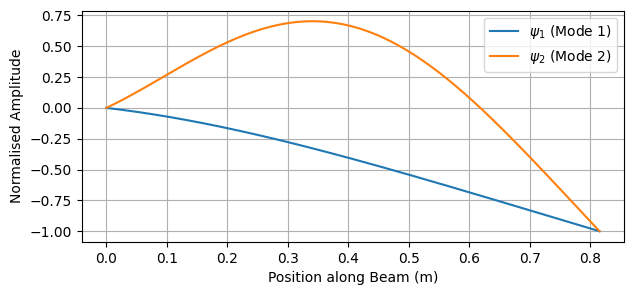

In [ ]:
# ================= Beam Mode Shape Visualization =================
beam_positions = np.linspace(0, beam_length, 1000)

first_mode_shape = mode_shape(beam_positions, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)
second_mode_shape = mode_shape(beam_positions, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

normalized_mode1 = first_mode_shape / np.max(np.abs(first_mode_shape))
normalized_mode2 = second_mode_shape / np.max(np.abs(second_mode_shape))

plt.figure(figsize=(7, 3))
plt.plot(beam_positions, normalized_mode1, label=r'$\psi_1$ (Mode 1)')
plt.plot(beam_positions, normalized_mode2, label=r'$\psi_2$ (Mode 2)')

plt.xlabel('Position along Beam (m)')
plt.ylabel('Normalised Amplitude')
plt.grid(True)
plt.legend()
plt.show()

From the above results, we can assume that at $l_{damper} = 0.2\,m,\,\, |\psi_1(l_{damper})| << |\psi_2(l_{damper})|$. To be precise, we have already computed that $\psi_1(l_{damper}) = -0.2491$ and $\psi_2(l_{damper}) = 0.7102$. Then,

$$
\psi_2^2(l_{damper}) = 0.5044 \:\:\:\:\:\:\: \psi_1(l_{damper})\psi_2(l_{damper}) = -0.1769
$$

<br>

Therefore, $|\psi_1(l_{damper})| << |\psi_2(l_{damper})|$ and the off-diagonal terms of $C_{damper}$ can be neglected. i.e. the coupling is small.

Hence, assume **Reyleigh Proportional Damping** for the system:

$$
\mathbf{C} = \alpha\,\mathbf{M} + \beta\,\mathbf{K}
$$

Then,

$$
\phi_k^T\mathbf{C}\phi_k = \alpha\,\phi_k^T\mathbf{M}\phi_k + \beta\,\phi_k^T\mathbf{K}\phi_k \tag{3}
$$

Recall:

\begin{align*}
(\mathbf{K}-\omega^2\mathbf{M})\,\phi &= 0 \\
\phi_k^T\mathbf{K}\phi_k &= \omega_k^2\phi_k^T\mathbf{M}\phi_k
\end{align*}

Back substitute to $(3)$:

\begin{align*}
\phi_k^T\mathbf{C}\phi_k &= \alpha\,\phi_k^T\mathbf{M}\phi_k + \beta\,(\omega_k^2\phi_k^T\mathbf{M}\phi_k) \\
\phi_k^T\mathbf{C}\phi_k &= (\alpha\ + \beta\,\omega_k^2) \phi_k^T\mathbf{M}\phi_k
\end{align*}

Back substitute to $(2)$:

$$
\zeta_k = \frac{(\alpha\ + \beta\,\omega_k^2) \phi_k^T\mathbf{M}\phi_k}{2\omega_k\phi_k^T \mathbf{M} \phi_k}
$$

$$
\zeta_k = \frac{1}{2} (\frac{\alpha}{\omega_k}+\beta\omega_k)
$$

Since $|\psi_1(l_{beam})| << |\psi_2(l_{beam})|$, the damper is closer to the second mode antinode and the first mode node. This means it predominantly affects the second mode, that is the high frequency mode.

Therefore, we can assume stiffness proportional damping for this system ($\zeta_2 > \zeta_1$). Take $\alpha = 0$.

$$
\zeta_k = \frac{\beta \omega_k}{2}
$$



Since the maximum operating frequency of the exciter in the experimental setup is 17 Hz and $\omega_2$ > 17 Hz, we can only experimentally estimate $\zeta_1$ at $\omega_1$. Using that relationship, $\zeta_2$ can be found.

$$
\zeta_1 = \frac{\beta \omega_1}{2} \:\:\:\:\:\:\:\ \text{and} \:\:\:\:\:\:\:\ \zeta_2 = \frac{\beta \omega_2}{2}
$$

$$
\zeta_2 = \zeta_1 \frac{\omega_2}{\omega_1}
$$

Consider the damped natural response at the supposed first mode as observed.
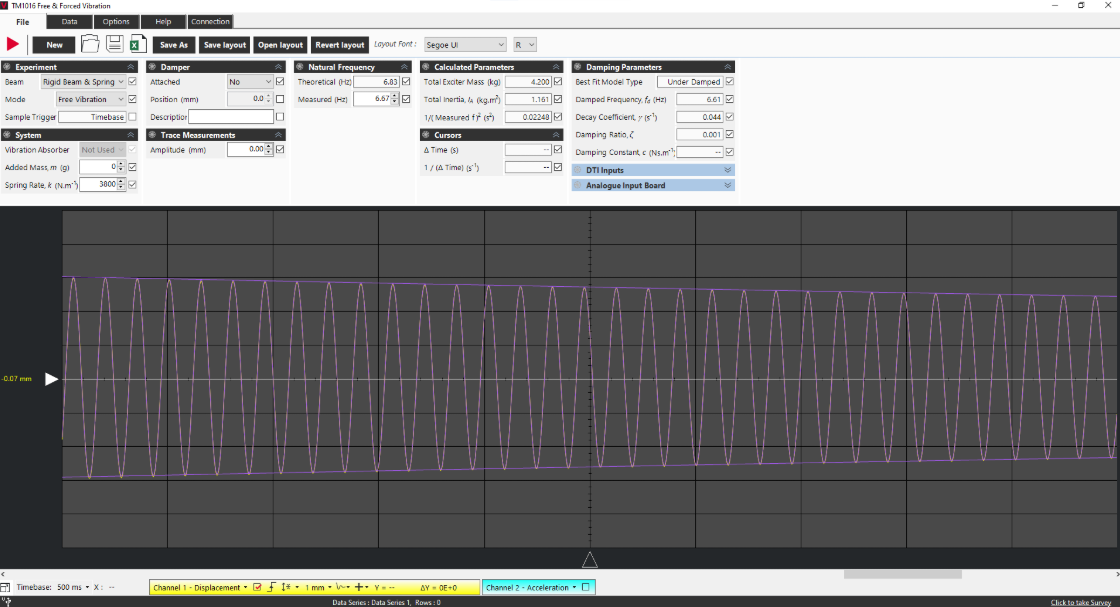

Since the initial displacement was applied at the free end of the beam, the free-decay response is dominated by the first mode, which has its maximum displacement (antinode) at the free end.

Therefore, we can deduce that the damping ratio observed in above response is $\zeta_1$.

\begin{align*}
\zeta_2 &= \zeta_1 \frac{\omega_2}{\omega_1}\\
\zeta_2 &= 0.008 \times \frac{204.048\,\,\text{rad/s}}{32.472\,\,\text{rad/s}}\\
\zeta_2 &= 0.05
\end{align*}



Therefore, estimated damping ratios for first two dominant modes:

$$
\zeta_1 = 0.008 \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\: \zeta_2 = 0.05
$$

**Activity 3: Graphical Representation of Selected Parameters**

**3.1 The Unforced Repsonse to an Initiail Diplacement of the Spring End of the Beam**

From the modal coordinates of the complete system:

$$
\mathbf{z}(t) = \Phi \,\mathbf{q}(t)
$$

$$
\begin{bmatrix}
z_1(t) \\ z_2(t)
\end{bmatrix}
=
\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}
\end{bmatrix}
\begin{bmatrix}
q_1(t) \\ q_2(t)
\end{bmatrix}
$$

Recall the truncated original 2-DOF solution for $y(x,t)$ for beam alone:

$$
y(x,t) = z_1(t) \psi_1(x) + z_2(t) \psi_2(x)
$$

We can rewrite the mode shapes to adjust the complete system with attachments.


\begin{align*}
y(x,t) &= (\phi_{11}\,q_1(t)+\phi_{12} \, q_2(t)) \psi_1(x) + (\phi_{21}\, q_1(t)+\phi_{22}\, q_2(t)) \psi_2(x) \\\\
y(x,t) &= \underbrace{(\phi_{11}\,\psi_1(x)+\phi_{21} \, \psi_2(x))}_{\psi_1^*(x)} q_1(t) + \underbrace{(\phi_{12}\,\psi_1(x)+\phi_{22} \, \psi_2(x))}_{\psi_2^*(x)} q_2(t)
\end{align*}

Let the initial displacement be $y(l_{beam}, 0) = y_o$. For that,

$$
y_o = \psi_1^*(l_{beam}) q_1(0) + \psi_2^*(l_{beam}) q_2(0)
$$

Since there are two unknowns and the initial displacement was applied at the free end of the beam, assume the response is dominated by the first mode only.

$$
q_2(0) = 0 \,\,\,\,\,\,\,\,\, \Rightarrow \,\,\,\,\,\,\,\,\, q_1(0) = \frac{y_o}{\psi_1^*({l_{beam})}}
$$

In order to find $q_1(t)$ and $q_2(t)$, the following ODE for unforced response need to be solved.

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\mathbf{C_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = 0
$$

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\beta\mathbf{K_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = 0
$$

with the initial conditions:

$$
\mathbf{q}(0) =
\begin{bmatrix}
q_1(0) \\ 0
\end{bmatrix},
\:\:\:\:
\mathbf{\ddot{q}}(0) =
\mathbf{\dot{q}}(0) =
\begin{bmatrix}
0 \\ 0
\end{bmatrix}
$$

where $\beta = \frac{2 \zeta_1}{\omega_1} =  \frac{2 \zeta_2}{\omega_2}$

Once $q_1(t)$ and $q_2(t)$ is found. For final solution of free damped vibration, substitute back to:

$$
y(x,t) = \psi_1^*(x) q_1(t) + \psi_2^*(x) q_2(t)
$$

In [ ]:
tip_displacement = 0.003         # Initial displacement at tip (m)

mode1_coeff1 = modal_matrix[0, 0]
mode1_coeff2 = modal_matrix[0, 1]
mode2_coeff1 = modal_matrix[1, 0]
mode2_coeff2 = modal_matrix[1, 1]

# =============== Combined Mode Shapes for Full System ================
def combined_mode_1(position):
    return mode1_coeff1 * mode_shape(position, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness) + \
           mode2_coeff1 * mode_shape(position, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

def combined_mode_2(position):
    return mode1_coeff2 * mode_shape(position, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness) + \
           mode2_coeff2 * mode_shape(position, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

combined_mode1_at_tip = combined_mode_1(beam_length)
print(f"combined_mode_1(beam_length) = {combined_mode1_at_tip:.4f}")

initial_modal_coord = tip_displacement / combined_mode1_at_tip
print(f"Initial modal coordinate initial_modal_coord = {initial_modal_coord:.4f}")

# =========== Modal Transformed Matrices ============
modal_mass_transformed = modal_matrix.T @ total_mass_matrix @ modal_matrix
modal_stiffness_transformed = modal_matrix.T @ total_stiffness_matrix @ modal_matrix

damping_ratio_1 = 0.008
damping_ratio_2 = 0.05
proportional_damping_coeff = 2 * damping_ratio_1 / natural_frequencies[0]

modal_damping_transformed = proportional_damping_coeff * modal_stiffness_transformed

combined_mode_1(beam_length) = 0.8515
Initial modal coordinate initial_modal_coord = 0.0035


In [ ]:
# =============== Solve ODE for Free Vibration Response ================
def modal_equation_of_motion(state_vector, time, inverse_mass, damping_matrix, stiffness_matrix):
    coord1, coord2, velocity1, velocity2 = state_vector
    coordinates = np.array([coord1, coord2])
    velocities = np.array([velocity1, velocity2])

    # Calculate accelerations: M_inv * (-C * velocity - K * displacement)
    accelerations = inverse_mass @ (-damping_matrix @ velocities - stiffness_matrix @ coordinates)

    return [velocity1, velocity2, accelerations[0], accelerations[1]]

inverse_modal_mass = np.linalg.inv(modal_mass_transformed)

initial_coord1 = initial_modal_coord
initial_coord2 = 0.0

initial_velocity1 = 0.0
initial_velocity2 = 0.0

initial_state = [initial_coord1, initial_coord2, initial_velocity1, initial_velocity2]

time_array = np.arange(0, 10, 0.001)

ode_solution = odeint(modal_equation_of_motion, initial_state, time_array, args=(inverse_modal_mass, modal_damping_transformed, modal_stiffness_transformed))

# Extract homogeneous solution components
modal_coord1_homogeneous = ode_solution[:, 0]
modal_coord2_homogeneous = ode_solution[:, 1]

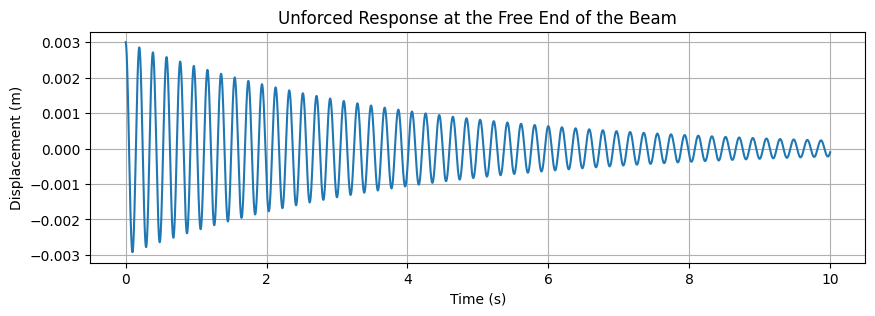

In [ ]:
# =============== Free Vibration Response at Beam Tip ================
physical_coord1 = np.zeros_like(time_array)
physical_coord2 = np.zeros_like(time_array)

for time_index in range(len(time_array)):
    modal_vector = np.array([modal_coord1_homogeneous[time_index], modal_coord2_homogeneous[time_index]])
    physical_vector = modal_matrix @ modal_vector
    physical_coord1[time_index] = physical_vector[0]
    physical_coord2[time_index] = physical_vector[1]

mode1_amplitude_at_tip = mode_shape(beam_length, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)
mode2_amplitude_at_tip = mode_shape(beam_length, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

tip_displacement_response = physical_coord1 * mode1_amplitude_at_tip + physical_coord2 * mode2_amplitude_at_tip

plt.figure(figsize=(10, 3))
plt.plot(time_array, tip_displacement_response)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Unforced Response at the Free End of the Beam')
plt.grid(True)
plt.show()

In [ ]:
beam_response = np.zeros((len(time_array), len(beam_positions)))

# =============== Calculate Beam Displacement y(x,t) Over Time ================
for time_step in range(len(time_array)):
    def full_system_mode1(x_positions):
        return (mode1_coeff1 * mode_shape(x_positions, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness) +
                mode2_coeff1 * mode_shape(x_positions, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness))

    def full_system_mode2(x_positions):
        return (mode1_coeff2 * mode_shape(x_positions, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness) +
                mode2_coeff2 * mode_shape(x_positions, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness))

    beam_response[time_step, :] = (
        full_system_mode1(beam_positions) * modal_coord1_homogeneous[time_step] +
        full_system_mode2(beam_positions) * modal_coord2_homogeneous[time_step]
    )

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlim(0, beam_length)

maximum_displacement = np.max(np.abs(beam_response)) * 1.1
ax.set_ylim(-maximum_displacement, maximum_displacement)

ax.set_xlabel('Position along Beam (m)')
ax.set_ylabel('Displacement (m)')
ax.set_title('Beam Vibration Animation (Unforced Response)')
ax.grid(True)

beam_line, = ax.plot([], [], lw=2)

def initialize_animation():
    beam_line.set_data([], [])
    return beam_line,

def update_frame(frame_index):
    beam_line.set_data(beam_positions, beam_response[frame_index, :])
    return beam_line,

frame_skip = 10
animation_frames = range(0, len(time_array), frame_skip)

beam_animation = FuncAnimation(
    fig, update_frame, init_func=initialize_animation, frames=animation_frames,
    interval=int((time_array[1] - time_array[0]) * frame_skip * 1000),
    blit=True)

plt.close(fig)
HTML(beam_animation.to_html5_video()) # Use Colab Notebook

**3.2 The Forced Response for Three Choices of the Rotational Speed of the Motor**

Consider the forced response to the complete system.

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\mathbf{C_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = \mathbf{F_m}
$$

where

$$
\mathbf{F_{m}} = \Phi^T \mathbf{F_{exciter}}, \,\,\,\,\,\,\,\,\, \text{where} \,\,\,\,\,\,\, \mathbf{F_{exciter}} = \begin{bmatrix} Q(\Omega) \psi_1(l_{exciter}) \sin{(\Omega t)} \\[1mm] Q(\Omega) \psi_2(l_{exciter}) \sin{(\Omega t)}
\end{bmatrix}
$$

The rotating unbalance of the exciter motor can be given by,

$$
Q(\Omega) = m_{ecc} r \Omega^2
$$

where $m_{ecc}$ is the eccentric mass and $r$ is the offset of the eccentric mass of the servomotor exciter.

The above non-homogeneous ODE can be then solved for $\mathbf{q_t}(t)$ particular solution due to forcing, which can be back substituted to following displacement solution for the plot.

$$
y(x,t) = \psi_1^*(x) q_1(t) + \psi_2^*(x) q_2(t)
$$

In [ ]:
# =============== Excitation Force Parameters ================
excitation_freq_1 = 32.472    # Near first resonance
excitation_freq_2 = 100.0     # Intermediate frequency
excitation_freq_3 = 204.048   # Near second resonance

excitation_frequencies = [excitation_freq_1, excitation_freq_2, excitation_freq_3]

eccentric_mass =  0.0045     # Total eccentric mass x 2 (kg)
eccentricity   =  0.035      # Radial offset (m)

def calculate_force_amplitude(ecc_mass, radius, angular_frequency):
    #return 1.0
    return 2 * ecc_mass * radius * angular_frequency**2

In [ ]:
# =============== Solve Forced Vibration Response ================
time_array = np.arange(0, 7.5, 0.001)

def forced_modal_dynamics(state_vec, time_val, inv_mass_matrix, damping_matrix, stiffness_matrix, forcing_freq, force_mag, mode_shapes_at_force):
    coord1, coord2, vel1, vel2 = state_vec
    coordinates = np.array([coord1, coord2])
    velocities = np.array([vel1, vel2])

    external_force = mode_shapes_at_force * force_mag * np.sin(forcing_freq * time_val)

    # Equation: q_ddot = M_inv * (F - C*q_dot - K*q)
    accelerations = inv_mass_matrix @ (external_force - damping_matrix @ velocities - stiffness_matrix @ coordinates)

    return [vel1, vel2, accelerations[0], accelerations[1]]

# Starting conditions
initial_conditions = [0.0, 0.0, 0.0, 0.0]

exciter_mode_shapes = np.array([combined_mode_1(exciter_position), combined_mode_2(exciter_position)])

# Calculate responses for three different excitation frequencies
forced_responses = []

for forcing_frequency in excitation_frequencies:

    force_amplitude = calculate_force_amplitude(eccentric_mass, eccentricity, forcing_frequency)

    response_data = odeint(forced_modal_dynamics, initial_conditions, time_array,
    args=(inverse_modal_mass, modal_damping_transformed, modal_stiffness_transformed, forcing_frequency, force_amplitude, exciter_mode_shapes)
    )

    forced_responses.append(response_data)

In [ ]:
# =============== Generate Animated Forced Vibration Response ================
for freq_index, forcing_frequency in enumerate(excitation_frequencies):

    current_solution = forced_responses[freq_index]
    modal_response_1 = current_solution[:, 0]
    modal_response_2 = current_solution[:, 1]

    spatial_temporal_response = np.zeros((len(time_array), len(beam_positions)))
    for time_step in range(len(time_array)):
        spatial_temporal_response[time_step, :] = (
            full_system_mode1(beam_positions) * modal_response_1[time_step] +
            full_system_mode2(beam_positions) * modal_response_2[time_step]
        )

    fig, ax = plt.subplots(figsize=(7, 3))
    ax.set_xlim(0, beam_length)

    max_amplitude = np.max(np.abs(spatial_temporal_response)) * 1.1
    ax.set_ylim(-max_amplitude, max_amplitude)

    ax.set_xlabel('Position along Beam (m)')
    ax.set_ylabel('Displacement (m)')
    ax.set_title(f'Forced Response, Ω = {forcing_frequency:.2f} rad/s')
    ax.grid(True)

    response_line, = ax.plot([], [], lw=2)

    def initialize_plot():
        response_line.set_data([], [])
        return response_line,

    def update_animation(frame_num):
        response_line.set_data(beam_positions, spatial_temporal_response[frame_num, :])
        return response_line,

    frame_interval = 10
    selected_frames = range(0, len(time_array), frame_interval)

    forced_animation = FuncAnimation(
        fig, update_animation, init_func=initialize_plot, frames=selected_frames,
        interval=int((time_array[1] - time_array[0]) * frame_interval * 1000),
        blit=True
    )

    plt.close(fig)
    display(HTML(forced_animation.to_html5_video())) # Use Colab Notebook

**3.3 Theoretical Frequency Response of the System that Captures the First Two Dominant Modes**

The frequency response of the system is given by,

$$
G(x,\Omega) = \frac{\text{Displacement Amplitude}}{\text{Force Amplitude}}=\frac{Y(x, \Omega)}{Q(\Omega)}
$$

<br>

We can modify $\chi_k(\Omega) = \left|\frac{Q \psi_k(l_{exciter})}{m_k\sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}}\right|
$ and $\phi_k(\Omega) =\arctan{\left(\frac{2\zeta_k\Omega\omega_k}{\omega_k^2 - \Omega^2}\right)}$ to represent the modal amplitudes and phases of complete system with attachments.

$$
\chi_k^*(\Omega) = \left|\frac{Q(\Omega) \psi_k^*(l_{exciter})}{M_{m_k}\sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}}\right|
$$

$$
\phi^*_k(\Omega) =\arctan{\left(\frac{2\zeta_k\Omega\omega_k}{\omega_k^2 - \Omega^2}\right)}
$$

**Note:** Here, $\omega_k$ and $\zeta_k$ are natural frequencies and damping ratios of the complete system with attachements.

Then, we can write:

\begin{align*}
y(x,t) &= \psi_1^*(x) q_1(t) + \psi_2^*(x) q_2(t) \\
y(x,t) &= \chi_1^*(\Omega) \cos(\Omega t + \phi^*_1(\Omega)) \, \psi^*_1(x)
+ \chi_2^*(\Omega) \cos(\Omega t + \phi^*_2(\Omega)) \, \psi^*_2(x)
\end{align*}


Substitute $\cos(\Omega t + \phi^*_k(\Omega) = \Re \{ e^{j(\Omega t + \phi_k^*(\Omega))} \}$

\begin{align*}
y(x,t) &= \Re \{ \chi_1^*(\Omega) \, \psi^*_1(x) \, e^{j(\Omega t + \phi_1^*(\Omega))}
+ \chi_2^*(\Omega) \, \psi^*_2(x) \, e^{j(\Omega t + \phi_1^*(\Omega))} \}  \\
y(x,t) &= \Re \{ \chi_1^*(\Omega) \, \psi^*_1(x) \, e^{j\Omega t} e^{j\phi_1^*(\Omega)}
+ \chi_2^*(\Omega) \, \psi^*_2(x) \, e^{j\Omega t} e^{j\phi_2^*(\Omega)} \} \\
y(x,t) &= \Re \{ \underbrace{[\chi_1^*(\Omega) \, \psi^*_1(x) \, e^{j\phi_1^*(\Omega)}
+ \chi_2^*(\Omega) \, \psi^*_2(x) \,  e^{j\phi_2^*(\Omega)}]}_{Y(x,\Omega)} e^{j\Omega t} \}
\end{align*}

We can then factor out the time-depedent term to obtain the displacement in frequency domain.

$$
Y(x,\Omega) = \chi_1^*(\Omega) \, \psi^*_1(x) \, e^{j\phi_1^*(\Omega)}
+ \chi_2^*(\Omega) \, \psi^*_2(x) \,  e^{j\phi_2^*(\Omega)}
$$

Note that our original definition of $\chi^*_k$ contains magnitude information, i.e. $|(\omega_k^2 - \Omega^2) + j(2 \zeta_k \Omega \omega_k)| = \sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}$ and $\phi^*_k$ contains phase information. i.e. $\text{arg}((\omega_k^2 - \Omega^2) + j(2 \zeta_k \Omega \omega_k))$.

However, for frequency response, we must revert back to its complex form to retain both magnitude and phase information. Then, we can write:

$$
Y(x,\Omega) =  \frac{Q(\Omega) \psi_1^*(l_{exciter})}{M_{m_1}((\omega_1^2 - \Omega^2)+j(2\zeta_1\Omega\omega_1))} \, \psi^*_1(x)
+ \frac{Q(\Omega) \psi_2^*(l_{exciter})}{M_{m_2}((\omega_2^2 - \Omega^2)+j(2\zeta_2\Omega\omega_2))} \, \psi^*_2(x)
$$

$$
\frac{Y(x,\Omega)}{Q(\Omega)} = \frac{1}{Q(\Omega)} \left[\frac{Q(\Omega) \psi_1^*(l_{exciter}) \, \psi^*_1(x)}{M_{m_1}((\omega_1^2 - \Omega^2)+j(2\zeta_1\Omega\omega_1))}
+ \frac{Q(\Omega) \psi_2^*(l_{exciter}) \, \psi^*_2(x)}{M_{m_2}((\omega_2^2 - \Omega^2)+j(2\zeta_2\Omega\omega_2))} \right]
$$

**Frequency Response Function:**

$$
G(x, \Omega) = \frac{\psi_1^*(l_{exciter}) \, \psi^*_1(x)}{M_{m_1}((\omega_1^2 - \Omega^2)+j(2\zeta_1\Omega\omega_1))}
+ \frac{\psi_2^*(l_{exciter}) \, \psi^*_2(x)}{M_{m_2}((\omega_2^2 - \Omega^2)+j(2\zeta_2\Omega\omega_2))}
$$

Through this function, $|G(x,\Omega)|$ can be taken for magnitude response and $\text{arg}(G(x,\Omega))$ can be taken for phase response.

In [ ]:
# ======================= Define Measurement Locations for FRF =========================
measurement_position_1 = beam_length
measurement_position_2 = damper_position
measurement_position_3 = 0.5       # Near node of second mode

measurement_locations = np.array([measurement_position_1, measurement_position_2, measurement_position_3])

mode1_at_measurements = np.array([combined_mode_1(pos) for pos in measurement_locations])
mode2_at_measurements = np.array([combined_mode_2(pos) for pos in measurement_locations])

mode1_at_force_location = combined_mode_1(exciter_position)
mode2_at_force_location = combined_mode_2(exciter_position)

system_freq_1, system_freq_2 = natural_frequencies[0], natural_frequencies[1]

modal_mass_mode1 = modal_mass_transformed[0, 0]
modal_mass_mode2 = modal_mass_transformed[1, 1]

# =========================== Frequency Response Function Calculation ================================
def calculate_FRF(location_idx, excitation_omega):

    denominator_mode1 = (system_freq_1**2 - excitation_omega**2) + 1j * (2 * damping_ratio_1 * excitation_omega * system_freq_1)
    denominator_mode2 = (system_freq_2**2 - excitation_omega**2) + 1j * (2 * damping_ratio_2 * excitation_omega * system_freq_2)

    contribution_mode1 = (mode1_at_force_location * mode1_at_measurements[location_idx]) / (modal_mass_mode1 * denominator_mode1)
    contribution_mode2 = (mode2_at_force_location * mode2_at_measurements[location_idx]) / (modal_mass_mode2 * denominator_mode2)

    return contribution_mode1 + contribution_mode2

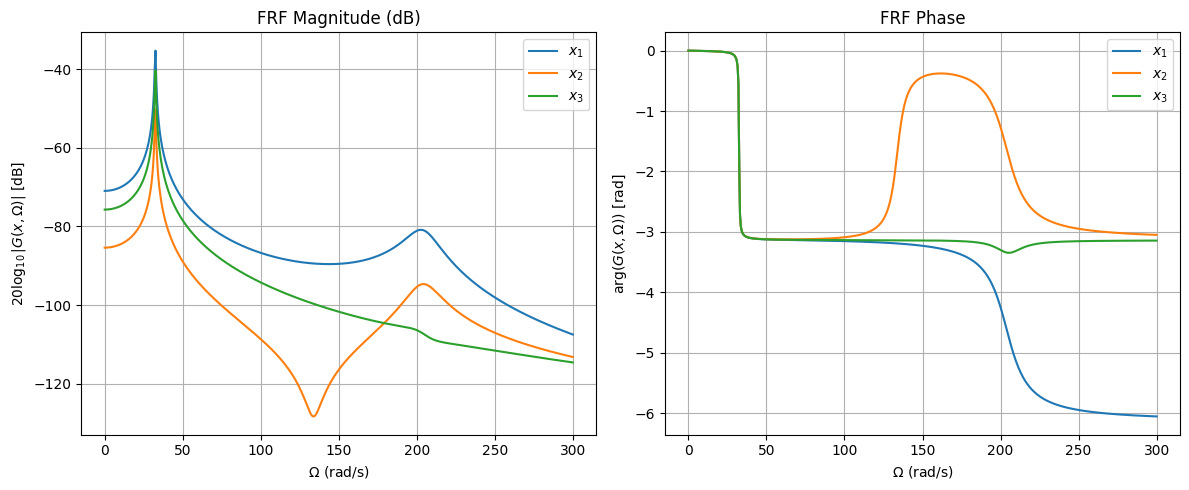

In [ ]:
# ============ Compute Frequency Response Functions at Three Beam Locations ==============
frequency_range = np.linspace(0.01, 300, 600)

FRF_responses = np.zeros((3, len(frequency_range)), dtype=complex)

for location_index in range(3):
    for freq_index, excitation_frequency in enumerate(frequency_range):
        FRF_responses[location_index, freq_index] = calculate_FRF(location_index, excitation_frequency)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Magnitude plot in decibels
for location_index in range(3):
    axs[0].plot(frequency_range, 20 * np.log10(np.abs(FRF_responses[location_index])), label=f"$x_{location_index+1}$")
axs[0].set_xlabel(r"$\Omega$ (rad/s)")
axs[0].set_ylabel(r"$20\log_{10}|G(x,\Omega)|$ [dB]")
axs[0].set_title("FRF Magnitude (dB)")
axs[0].legend()
axs[0].grid(True)

# Phase plot with unwrapping
for location_index in range(3):
    axs[1].plot(frequency_range, np.unwrap(np.angle(FRF_responses[location_index])), label=f"$x_{location_index+1}$")
axs[1].set_xlabel(r"$\Omega$ (rad/s)")
axs[1].set_ylabel(r"$\arg(G(x,\Omega))$ [rad]")
axs[1].set_title("FRF Phase")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

**Activity 4: Experimental Characterisation of System Frequency Response Near Resonance: Determination of $\omega _{d}$ and $y_{ss,max}$ with Theoretical Comparative Analysis**

In order for a comparison, the analysis should be done on the same point of the beam. Let that point be $x = 0.5\,\text{m}$ where the displacement sensor is attached in the experimental setup.

Note that the displacement sensor is positioned near a node of the 2nd mode; consequently, 2nd mode frequency characteristics are not captured in the experimental data, as predicted by the $x_{2}$ plot in the theoretical response.

Furthermore, since the exciter’s maximum frequency is limited to 17 Hz, the experimental setup is restricted to the characterisation of the 1st resonant mode.

**Experimental Frequency Response:**

<center>
 <span style="display: block; text-align: center; margin-top: 5px;"><em>Table 1: Displacement Amplitude Measurements with the Variation of Exciter Speed</em></span>

<table border="1">
  <tr align = "center"><td>Exciter Speed<br> / Hz</td><td>Displacement Amplitude <br> / mm</td><td>Phase Angle <br> / deg</td><td>Exciter Speed <br> / Hz</td><td>Displacement Amplitude <br> / mm</td><td>Phase Angle <br> / deg</td></tr>
  <tr align = "center"><td>5.17</td><td>0.0902</td><td>13</td><td>6.57</td><td>1.9860</td><td>120</td></tr>
  <tr align = "center"><td>5.42</td><td>0.1172</td><td>13</td><td>6.67</td><td>1.0245</td><td>142</td></tr>
  <tr align = "center"><td>5.67</td><td>0.1903</td><td>15</td><td>6.77</td><td>0.6575</td><td>155</td></tr>
  <tr align = "center"><td>5.92</td><td>0.2285</td><td>16</td><td>6.87</td><td>0.4890</td><td>165</td></tr>
  <tr align = "center"><td>6.17</td><td>0.4148</td><td>18</td><td>7.12</td><td>0.3070</td><td>172</td></tr>
  <tr align = "center"><td>6.27</td><td>0.5850</td><td>22</td><td>7.37</td><td>0.2260</td><td>178</td></tr>
  <tr align = "center"><td>6.37</td><td>0.9735</td><td>60</td><td>7.62</td><td>0.1847</td><td>179</td></tr>
  <tr align = "center"><td>6.47</td><td>2.2090</td><td>93</td><td>7.87</td><td>0.1569</td><td>179</td></tr>
</table>
</center>

<br>

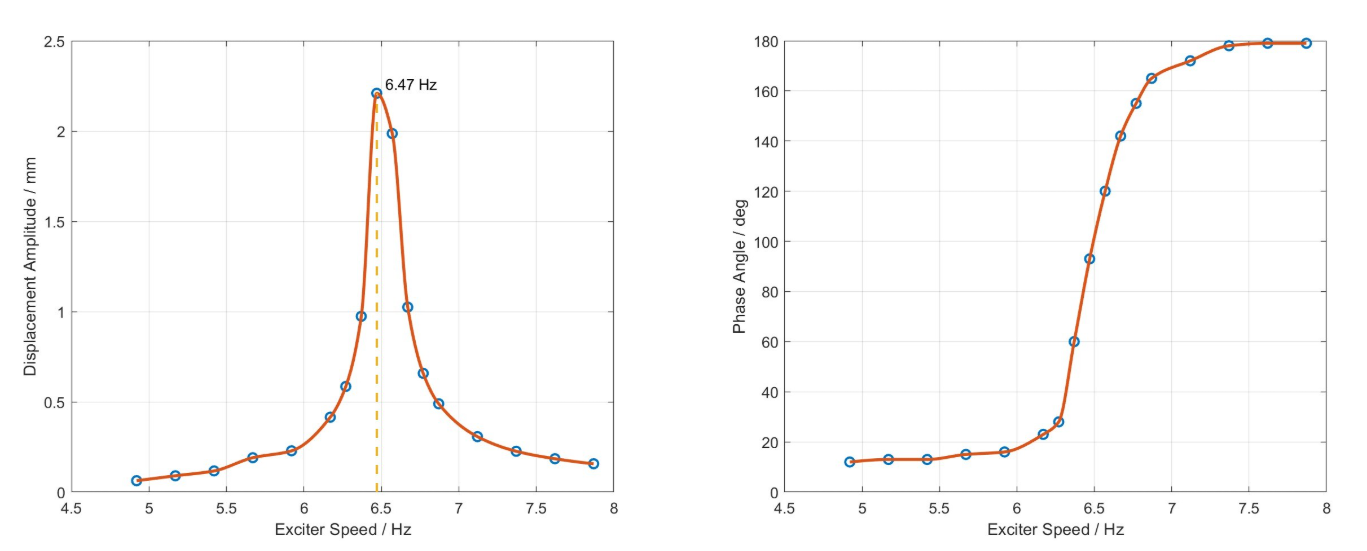

From Figure 5 above, it is possible to obtain the maximum displacement amplitude:

$$
y_{ss,max} = 2.2090\,\text{mm}
$$

From Figure 4, damping frequency is measured to be:

$$
\omega_d = 6.52\,\text{Hz} = 40.95 \, \text{rad/s}
$$

**Theoretical $\omega _{d}$ and $y_{ss,max}$ Estimation:**

In [ ]:
# ===================== Calculate Maximum Steady-State Displacement at x = 0.5 ======================
force_amplitude_mode1 = calculate_force_amplitude(eccentric_mass, eccentricity, 32.472)

# Solve forced response for first resonance frequency
single_frequency_response = odeint(forced_modal_dynamics, initial_conditions, time_array,
        args=(inverse_modal_mass, modal_damping_transformed, modal_stiffness_transformed, 32.472, force_amplitude_mode1, exciter_mode_shapes))

modal_coord1_response = single_frequency_response[:, 0]
modal_coord2_response = single_frequency_response[:, 1]

displacement_at_midpoint = (full_system_mode1(0.5) * modal_coord1_response +
             full_system_mode2(0.5) * modal_coord2_response)

maximum_displacement_mode1 = np.max(np.abs(displacement_at_midpoint))

print(f"Maximum displacement at x = 0.5 m in 1st Mode: {maximum_displacement_mode1:.7f} m")

Maximum displacement at x = 0.5 m in 1st Mode: 0.0029107 m


$y_{ss,max}$ observed at $x = 0.5\,\text{m}$ from theoretical estimation:

$$
y_{max,theoretical} = 3.1467\,\text{mm}
$$

Damping frequency can be deduced as shown below:

$$
\omega_d = \omega_1 \sqrt{1 - \zeta_1^2} = 32.472\,\text{rad/s} \sqrt{1 - 0.008^2} = 32.471\,\text{rad/s}
$$


**Results & Discussion:**

<center>
 <span style="display: block; text-align: center; margin-top: 5px;"></span>

<table border="1">
  <tr align = "center"><td></td><td>Experimental</td><td>Theoretical</td></tr>
  <tr align = "center"><td>$\omega_d$</td><td>40.95 rad/s</td><td>32.47 rad/s</td></tr>
  <tr align = "center"><td>$y_{ss,max}$</td><td>2.2090 mm</td><td>3.1467 mm</td></tr>
</table>
</center>

According to the resutls obtained above, a considerable discrepancy can be observed with respect to theoretical estimates, which stems from the deviation of the effective stiffness of the system from the actual value.

In the TecQuipment User Guide [1], it can be seen that a closer theoretical estimate for the first natural frequency is derived from Rigid Beam Theory compared to the Euler-Bernoulli Theory used in this report, which means the more 'advanced' model is in fact less accurate. In other words, Euler-Bernoulli Theory discredits the actual physical reality of the problem.

$$
\omega_n ∝ \sqrt{\frac{k}{m}}
$$

The reason behind this is that we have accounted for flexure in the beam unlike Rigid Beam Theory. However, in reality, the flexure in the beam itself is negligible compared to spring for lower frequencies. Thus, rigid theory fits better for the actual physical model and our assumption of flexural behaviour has lowered the theoretical natural frequency of beam. The same assumption has increased the theoretical maximum displacement of the beam compared to its actual value as it accounted for flexural movement in addition to rigid movement.

Another source of error would be the idealisation of base boundary condition related to rotational stiffness. When the beam is flexed during rotation, the actual displacement of the spring may not be equal to $y_{spring} = \theta l_{spring}$ as it has been taken. Moreover, the lumped mass effect of the exciter motor would cause the fundamental frequency to behave as a straight line without flexure.

Considering all aspects above, the correct approach to model this experiment would be to use Reyleigh-Ritz Method, where the fundamental frequency is derived through Rigid Theory and the subsequent modes are estimated using Euler-Bernoulli Theory, and the results are combined to form a hybrid model at the cost of a more complicated mathematical model.

**Activity 5: Design of a Tuned Mass Vibration Absorber for Operating the System near First Natural Mode of Vibration and Justification using Simulations**

Consider the forced response at the first resonant frequency after attaching the absorber sub structure.

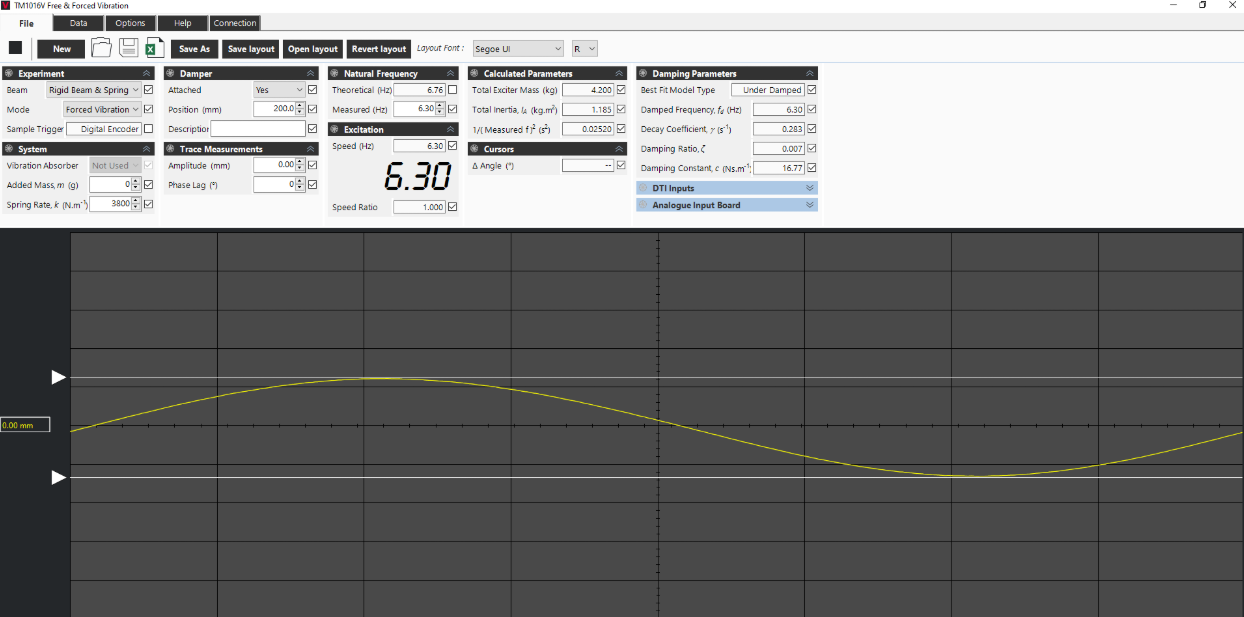

From the above figure, we can deduce that the first natural experimental mode exists at:

$$
f_1 = 6.30 \, \text{Hz}
$$

Consider the following schematic of the absorber designed for rigid beam and spring configuration. Note that since the motion is asymmetric about the plane with the exciter motor, only one out of two absorber beams is utilised for vibration mitigation to make 1 DOF system to 2 DOF system.

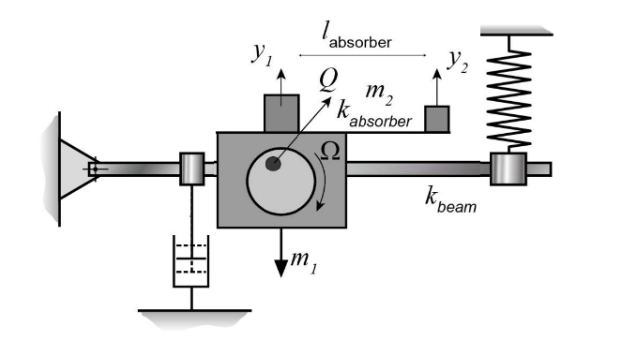

Note that the absorber can be modelled as a cantilever beam with a lumped mass $m_2$ at a distance $l_{absorber}$ from its base, which is at $l_{exciter}$.

Based on beam theory for a cantilever, the effective stiffness is then given by:

$$
k_{absorber} = \frac{3EI_{absorber}}{l_{absorber}^3}
$$

Assuming the absorber only gets excited at its first mode in the operational range, accounting for lumped mass effect, according to Reyleigh's formula, the effective modal mass contributing to its dynamics is given by:

$$
m_2 = m_{mass} + \frac{33}{140}m_{absorber beam}
$$

The frequency equation can be given by:

$$
f = 2 \pi \sqrt{\frac{k}{m}} = 2 \pi \sqrt{\frac{3EI_{absorber}}{m_2l_{absorber}^3}}
$$

Rearranging this to find the position of the mass on the beam gives:

$$
l_{absorber} = \left[ \frac{3EI}{m_2 (2 \pi f)^2}\right]^{\frac{1}{3}} \tag{4}
$$

In order to tune the vibration absorber to operate near first natural mode,

In [ ]:
# =================== Absorber Parameters ======================
E_absorber = 2e+11          # Modulus of Elasticity (Pa)
I_absorber = 7.2179e-12     # Area Moment of Inertia (m^4)
k_absorber = 1091           # Stiffness (N/m)
m_absorber = 0.438          # Total mass of the absorber setup (kg)
m_mass = 0.121              # Mass of the movable mass (kg)
m_absorberbeam = 0.126      # Beam mass (kg/m)

# Effective modal mass of the absorber
m2 = m_mass + (33/140) * m_absorberbeam

In [ ]:
# ============= Computing Absorber Mass Distance ===============
def calculate_l_absorber(f_hz):
    f_rad_s = 2 * np.pi * f_hz
    numerator = 3 * E_absorber * I_absorber
    denominator = m2 * (f_rad_s)**2
    l_absorber = (numerator / denominator)**(1/3)
    return l_absorber

f1_experimental = 6.30 #first natural experimental mode
l_absorber_calculated = calculate_l_absorber(f1_experimental)

print(f"Calculated l_absorber: {l_absorber_calculated:.4f} m")

Calculated l_absorber: 0.2637 m


Then, the distance of the movable mass from its base to mitigate the first mode vibrations is given as:

$$
l_{absorber} = 0.2637 \, \text{m}
$$



**Justification using Simulation:**

Recall that, in the last section, we discussed that Rigid Beam Theory yields a more accurate result compared to Euler-Bernoulli Theory when first mode is considered. Hence, let us remodel the experimental setup using Rigid Beam Theory for comparison.

Let $\theta$ be the angle of rotation of the rigid beam (shown in Figure 2) and $I_A$ be the total mass moment of inertia of the complete assembly.

$$
I_A = I_{beam} + I_{spring} + I_{exciter} + I_{damper} + I_{absorber}
$$

where

$$
I_{beam} = \frac{1}{12} m_{beam} l_{beam}^2 + m_{beam} \left(\frac{l_{beam}}{2}\right)^2 = \frac{1}{3} m_{beam} l_{beam}^2
$$

$$
I_{spring} = \left( \frac{m_{spring}}{3} + m_{fixing} \right) l_{spring}^2
$$

$$
I_{exciter} = m_{exciter} l_{exciter}^2
$$

$$
I_{damper} = m_{damper} l_{damper}^2
$$

$$
I_{absorber} = m_{absorber} l_{exciter}^2
$$

Newton's second law for the beam:

$$
I_A \ddot{\theta} + c\, l_{damper}^2 \dot{\theta} + k_{\theta} \theta - k_{absorber} (y_2 - y_1) = l_{exciter} \, Q(\Omega) \sin{\Omega t}
$$

But $y_1 = \theta \, l_{exciter}$

$$
I_A \ddot{\theta} + c\, l_{damper}^2 \dot{\theta} + k_{\theta} \theta - k_{absorber} (y_2 - \theta \, l_{exciter}) = l_{exciter} \, Q(\Omega) \sin{\Omega t}
$$

$$
I_A \ddot{\theta} + c\, l_{damper}^2 \dot{\theta} + (k_{\theta} + k_{absorber} l_{exciter})\theta - k_{absorber} y_2 = l_{exciter} \, Q(\Omega) \sin{\Omega t}
$$

Newton's second law for the absorber, assume negligible damping:

$$
m_2 \ddot{y} + k_{absorber} (y_2 - y_1) = 0
$$

$$
m_2 \ddot{y} + k_{absorber} (y_2 - \theta \, l_{exciter}) = 0
$$

Then, the 2 DOF system including the absorber can be written as:

\begin{align*}
\underbrace{\begin{bmatrix} I_A & 0 \\ 0 & m_2 \end{bmatrix}}_{M_A}
\begin{bmatrix} \ddot{\theta} \\ \ddot{y}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} c l_{damper}^2 & 0 \\ 0 & 0 \end{bmatrix}}_{C_A}
\begin{bmatrix} \dot{\theta} \\ \dot{y}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} (k_{\theta} + k_{absorber} l_{exciter}) & -k_{absorber} \\ -k_{absorber} l_{exciter} & k_{absorber} \end{bmatrix}}_{K_A}
\underbrace{\begin{bmatrix} \theta \\ y_2 \end{bmatrix}}_{\text{q}}
=
\begin{bmatrix} l_{exciter} Q(\Omega) \sin{\Omega t} \\ 0 \end{bmatrix}
\end{align*}

To find the new damping constant $c$, consider the following free vibration response of the beam.

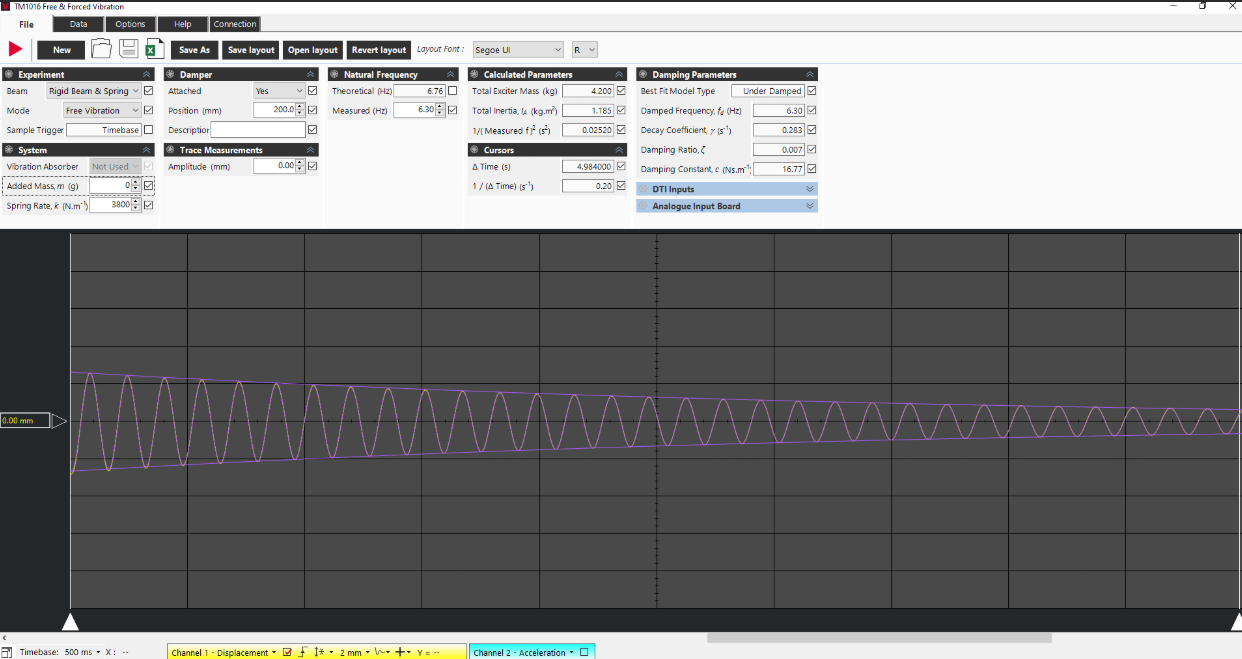

As in Activity 2, for model calibration, from experimental results, the damping constant can be taken as:

$$
c = 16.77\,\text{N s/m}
$$

# **Experiment 01** : **Introduction to the Equipment**

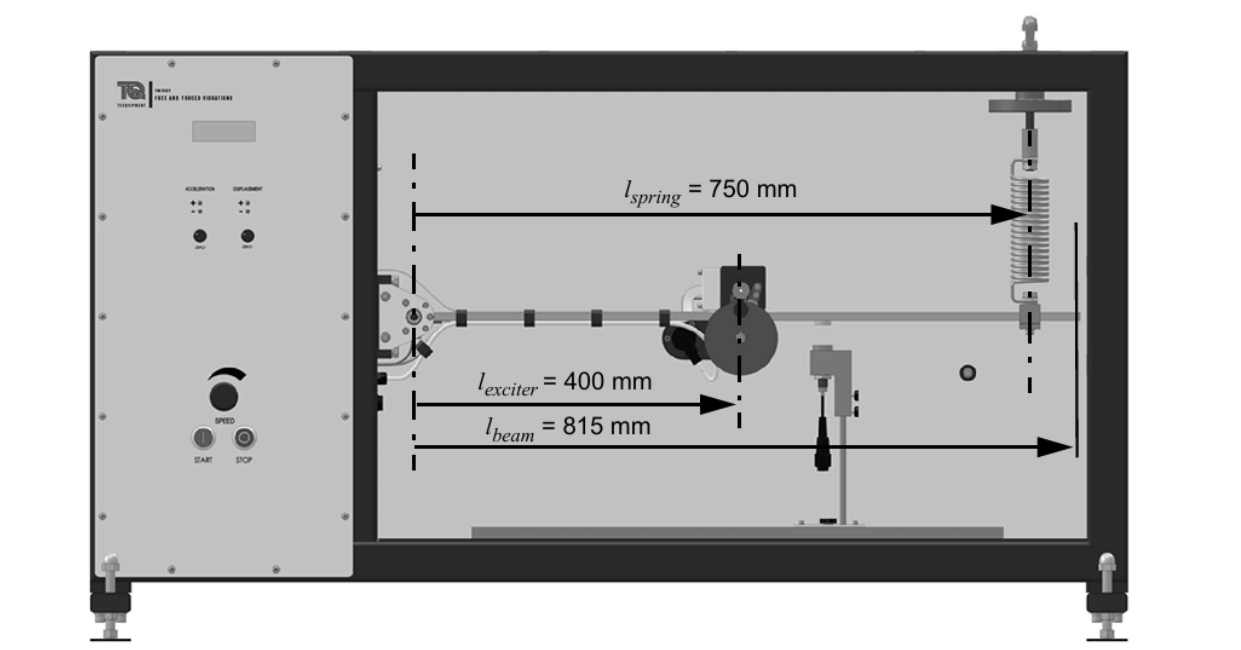

The test configuration consists of a cantilevered beam secured at one end in a fixed support structure. A vibration exciter is positioned on the beam at a distance of $l_{\text{exciter}} = 400~\mathrm{mm}$ from the clamped end, which allows for controlled dynamic forcing of the system.

The beam has a total length of $l_{\text{beam}} = 815~\mathrm{mm}$. At the free end of the beam, a vertical linear spring is connected with an effective length of $l_{\text{spring}} = 750~\mathrm{mm}$, contributing the necessary restoring force to the assembly.

This beam-spring system serves as the experimental apparatus for investigating the dynamic behavior under forced vibration conditions. Data obtained from Experiment 1 is then used for analysis and verification of the system's dynamic response characteristics.

**Procedure 1 -Free Vibration Displacement**